# Deep drill

In [9]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix

from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO 
from IPython.display import Image  
import pydotplus

In [10]:
dirpath = r'C:\Users\user\ML\Classification\deep drill'

In [11]:
df = pd.read_excel(dirpath+'/42452_2021_4769_MOESM1_ESM (1).xlsx')
df

HoleSection  M.Depth  RateofPenetration  WeightonBit  Rotation  Torque  \
0             17.5      823           4.081633      30.8000    139.00  4.3000   
1             17.5      824           4.545455      35.2000    119.00  4.3000   
2             17.5      825           5.172414      32.9000    117.00  4.4000   
3             17.5      826           8.333333      25.2000    121.00  3.9000   
4             17.5      827           7.594937      32.0000    129.00  4.3000   
...            ...      ...                ...          ...       ...     ...   
65371          8.5     3976           3.186000       7.6846    202.18  3.1006   
65372          8.5     3977           3.264000       8.1510    202.04  3.1450   
65373          8.5     3978           3.894000      11.5368    201.56  3.2190   
65374          8.5     3979           4.458000      11.0968    201.31  3.2190   
65375          8.5     3980           6.498000       9.9352    201.48  3.2486   

       StandpipePressure    FlowIn  FlowOut  PumpStroke  MudWeight  \
0                1084.00  726.0000    43.05      127.00       72.0   
1                 877.00  663.0000    37.56      116.00       72.0   
2                 780.00  643.0000    37.30      113.00       72.0   
3                 950.00  701.0000    38.48      123.00       72.0   
4                1214.00  788.0000    40.54      138.00       72.0   
...                  ...       ...      ...         ...        ...   
65371            2579.55  430.5971    73.64       93.64       81.0   
65372            2585.35  430.5971    72.31       93.69       81.0   
65373            2610.00  430.5971    71.29       93.55       81.0   
65374            2618.70  427.9554    71.20       93.16       81.0   
65375            2610.00  430.5971    71.50       92.20       81.0   

       FunnelViscosity  PlasticViscosity  YieldPoint  Gel Strength10sec  \
0                   36                 6          15                  7   
1                   36                 6          15                  7   
2                   36                 6          15                  7   
3                   36                 6          15                  7   
4                   36                 6          15                  7   
...                ...               ...         ...                ...   
65371               40                22          17                  4   
65372               40                22          17                  4   
65373               40                22          17                  4   
65374               40                22          17                  4   
65375               40                22          17                  4   

       Gel Strength10min  Solid LossesSeverity  
0                      8      8        No-Loss  
1                      8      8        No-Loss  
2                      8      8        No-Loss  
3                      8      8        No-Loss  
4                      8      8        No-Loss  
...                  ...    ...            ...  
65371                  6     17   Seepage Loss  
65372                  6     17   Seepage Loss  
65373                  6     17   Seepage Loss  
65374                  6     17   Seepage Loss  
65375                  6     17   Seepage Loss  

[65376 rows x 18 columns]

In [12]:
vc = df['LossesSeverity'].value_counts()
vc

LossesSeverity
No-Loss          49545
Seepage Loss     12880
Partial Loss      2647
Severe Loss        270
Complete Loss       34
Name: count, dtype: int64

In [13]:
features = list(df.columns)[:-1]
features

['HoleSection',
 'M.Depth',
 'RateofPenetration',
 'WeightonBit',
 'Rotation',
 'Torque',
 'StandpipePressure',
 'FlowIn',
 'FlowOut',
 'PumpStroke',
 'MudWeight',
 'FunnelViscosity',
 'PlasticViscosity',
 'YieldPoint',
 'Gel Strength10sec',
 'Gel Strength10min',
 'Solid']

In [14]:
X = df[features]
y = df['LossesSeverity']

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,)

(49032, 17) (16344, 17) (49032,) (16344,)


In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

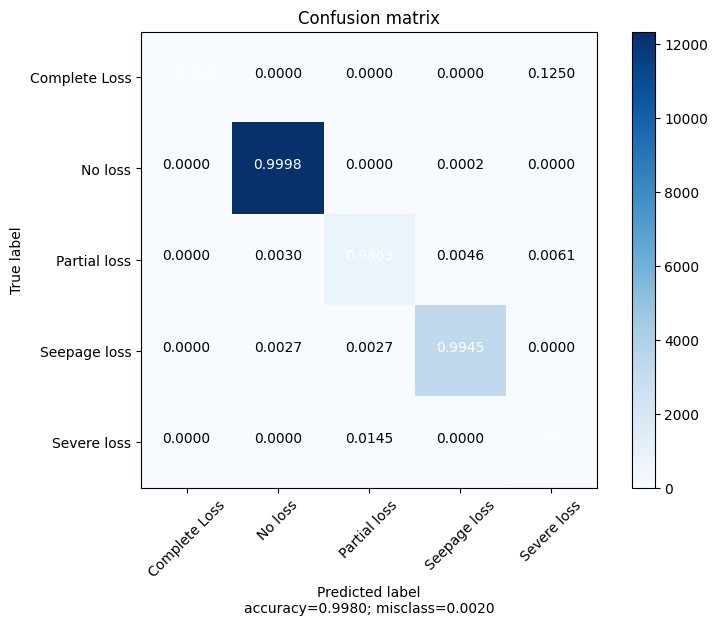

In [16]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['Complete Loss', 'No loss', 'Partial loss', 'Seepage loss', 'Severe loss'])

In [17]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9980420949583945
               precision    recall  f1-score   support

Complete Loss       1.00      0.88      0.93         8
      No-Loss       1.00      1.00      1.00     12333
 Partial Loss       0.98      0.99      0.99       659
 Seepage Loss       1.00      0.99      1.00      3275
  Severe Loss       0.93      0.99      0.96        69

     accuracy                           1.00     16344
    macro avg       0.98      0.97      0.97     16344
 weighted avg       1.00      1.00      1.00     16344



In [18]:
dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(X_train, y_train)

In [19]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names=features, class_names=['No-Loss', 'Seepage Loss', 'Partial Loss', 'Severe Loss', 'Complete Loss'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(dirpath+'/dt.png')
Image(graph.create_png())

In [20]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

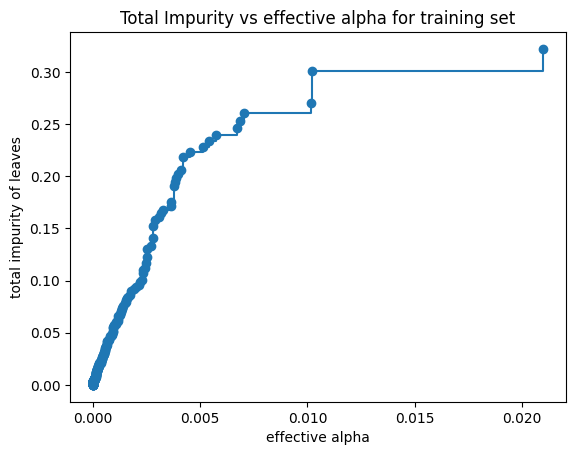

In [21]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [22]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03103449907858047


In [23]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()